In [17]:
# environment and libraries
import os
import glob
import numpy as np
import random
import cv2
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
warnings.simplefilter(action = "ignore", category = UserWarning)

from mpl_toolkits.mplot3d import Axes3D

In [18]:
input_image = cv2.imread('../images/beehive_house.jpg')

# Question 2

### Grayscale 

(320, 256, 3)
(320, 256)
(320, 256, 3)


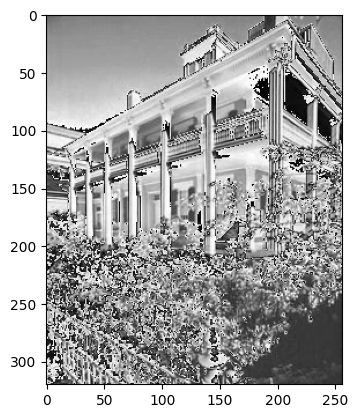

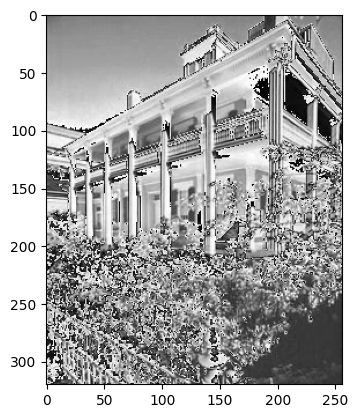

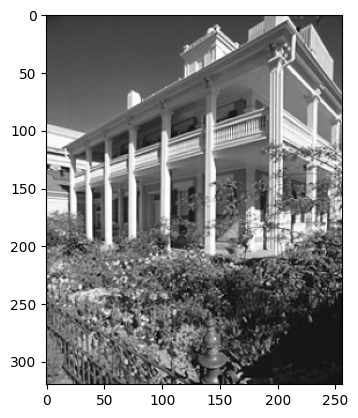

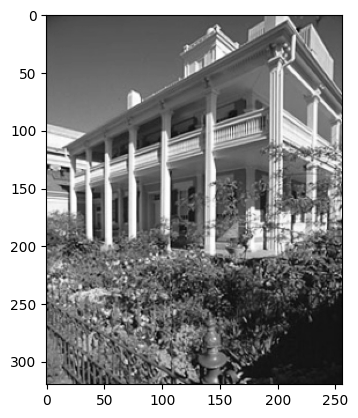

In [19]:
arr = np.array(input_image)
print(arr.shape)
print(arr[:, :, -1].shape)
print(arr[..., :3].shape)
red_channel = arr[:, :, 0]
green_channel = arr[:, :, 1]
blue_channel = arr[:, :, 2]

lightness = (np.max((red_channel, green_channel, blue_channel), axis=0) + np.min((red_channel, green_channel, blue_channel), axis=0)) / 2
lightness2 = (np.max(arr, axis=-1) + np.min(arr, axis=-1)) / 2
average = np.mean(arr, axis=-1)
luminosity = np.dot(arr[..., :3], [0.2989, 0.5870, 0.1140])


plt.imshow(lightness, cmap='gray')
plt.show()
plt.imshow(lightness2, cmap='gray')
plt.show()
plt.imshow(average, cmap='gray')
plt.show()
plt.imshow(luminosity, cmap='gray')
plt.show()

Red channel shape: (320, 256)


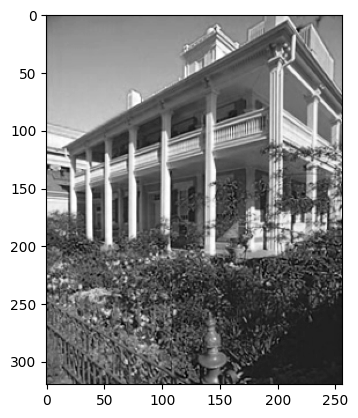

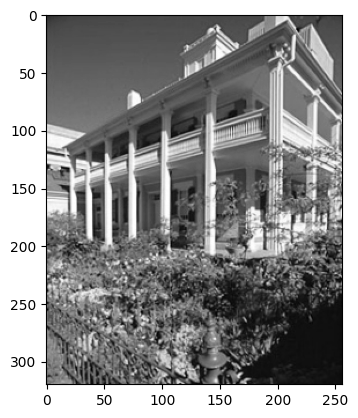

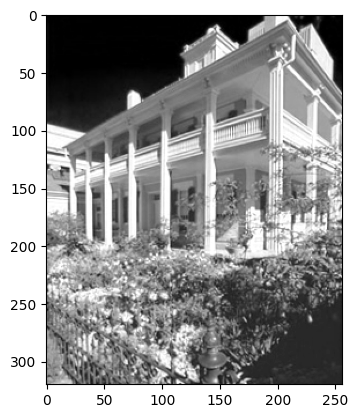

In [20]:
red_channel = arr[:, :, 0]
green_channel = arr[:, :, 1]
blue_channel = arr[:, :, 2]
print(f"Red channel shape: {red_channel.shape}")
plt.imshow(red_channel, cmap='gray')
plt.show()
plt.imshow(green_channel, cmap='gray')
plt.show()
plt.imshow(blue_channel, cmap='gray')
plt.show()


In [21]:
input_image = np.array(input_image)
red_channel = input_image[:, :, 0]
green_channel = input_image[:, :, 1]
blue_channel = input_image[:, :, 2]

opponent1 = (red_channel - green_channel) / np.sqrt(2)
opponent2 = (red_channel + green_channel - 2 * blue_channel) / np.sqrt(6)
opponent3 = (red_channel + green_channel + blue_channel) / np.sqrt(3)

new_image = np.stack([opponent1, opponent2, opponent3], axis=-1)
new_image

array([[[ 32.52691193,  50.62278802,  71.59143338],
        [ 33.9411255 ,  53.88877434,  84.87048957],
        [ 36.76955262,  54.70527092,  86.02519011],
        ...,
        [ 36.76955262,  64.50322989,  96.41749495],
        [ 36.06244584,  66.54447135,  95.84014469],
        [ 36.06244584,  65.72797476,  92.95339334]],

       [[ 32.52691193,  51.4392846 ,  72.74613392],
        [ 33.9411255 ,  53.88877434,  86.60254038],
        [ 36.06244584,  55.93001579,  86.02519011],
        ...,
        [ 36.06244584,  66.54447135,  95.84014469],
        [ 38.18376618,  66.95271964,  96.41749495],
        [ 38.18376618,  66.95271964,  98.14954576]],

       [[ 33.9411255 ,  53.88877434,  76.21023553],
        [ 34.64823228,  55.93001579,  89.48929172],
        [ 36.76955262,  59.60425041,  87.75724092],
        ...,
        [ 36.76955262,  70.21870596, 101.03629711],
        [ 38.89087297,  68.99396109,  99.3042463 ],
        [ 38.89087297,  68.99396109, 101.03629711]],

       ...,

      

In [22]:
np.min(new_image, axis=-1)

array([[32.52691193, 33.9411255 , 36.76955262, ..., 36.76955262,
        36.06244584, 36.06244584],
       [32.52691193, 33.9411255 , 36.06244584, ..., 36.06244584,
        38.18376618, 38.18376618],
       [33.9411255 , 34.64823228, 36.76955262, ..., 36.76955262,
        38.89087297, 38.89087297],
       ...,
       [52.5388745 , 36.37306696, 57.73502692, ..., 13.43502884,
        13.43502884, 13.43502884],
       [35.79571669, 62.35382907, 70.21870596, ..., 11.3137085 ,
        11.3137085 , 11.3137085 ],
       [38.68246804, 42.72391992, 58.88972746, ..., 11.3137085 ,
        11.3137085 , 11.3137085 ]])

In [23]:
def convert_rgb_to_normedrgb(input_image):
    '''
    Converts an RGB image into the normalized RGB (nrgb) colour space and 
    returns the image with normalized RGB channels.

    Args:
        input_image: RGB image

    Returns:
        new_image: image with channels representing normalized RGB colour space
    '''
    input_image = np.array(input_image)
    input_image = np.flip(input_image, axis=-1)
    red_channel = input_image[:, :, 0]
    green_channel = input_image[:, :, 1]
    blue_channel = input_image[:, :, 2]

    normed_red = red_channel / (red_channel + green_channel + blue_channel)
    normed_green = green_channel / (red_channel + green_channel + blue_channel)
    normed_blue = blue_channel / (red_channel + green_channel + blue_channel)

    new_image = np.stack([normed_red, normed_green, normed_blue], axis=-1)

    # Normalize the image to the range [0, 255]
    new_image = new_image.astype(np.uint8)

    return new_image

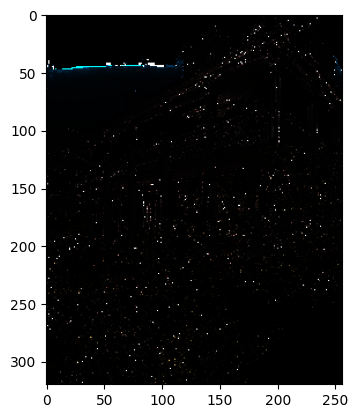

In [24]:
new_image = convert_rgb_to_normedrgb(input_image)
plt.imshow(new_image)
plt.show()

In [31]:
((input_image / 255) * 255).astype(np.uint8)

array([[[ 85,  39,   0],
        [ 95,  47,   5],
        [ 98,  46,   5],
        ...,
        [108,  56,   3],
        [108,  57,   1],
        [106,  55,   0]],

       [[ 86,  40,   0],
        [ 96,  48,   6],
        [ 98,  47,   4],
        ...,
        [108,  57,   1],
        [110,  56,   1],
        [111,  57,   2]],

       [[ 90,  42,   0],
        [ 99,  50,   6],
        [101,  49,   2],
        ...,
        [113,  61,   1],
        [113,  58,   1],
        [114,  59,   2]],

       ...,

       [[ 89, 116, 142],
        [ 81, 105, 133],
        [ 94, 115, 147],
        ...,
        [ 35,  16,  41],
        [ 32,  13,  38],
        [ 32,  13,  38]],

       [[ 81, 108, 129],
        [ 96, 122, 146],
        [113, 137, 167],
        ...,
        [ 32,  16,  40],
        [ 29,  13,  37],
        [ 29,  13,  37]],

       [[ 83, 110, 130],
        [ 85, 112, 133],
        [ 92, 118, 148],
        ...,
        [ 31,  15,  39],
        [ 28,  12,  36],
        [ 28,  12,  36]]

[85. 39.  0.]
[27.529413  1.       85.      ]
[27  1 85]


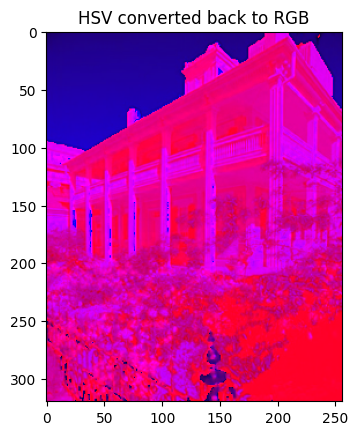

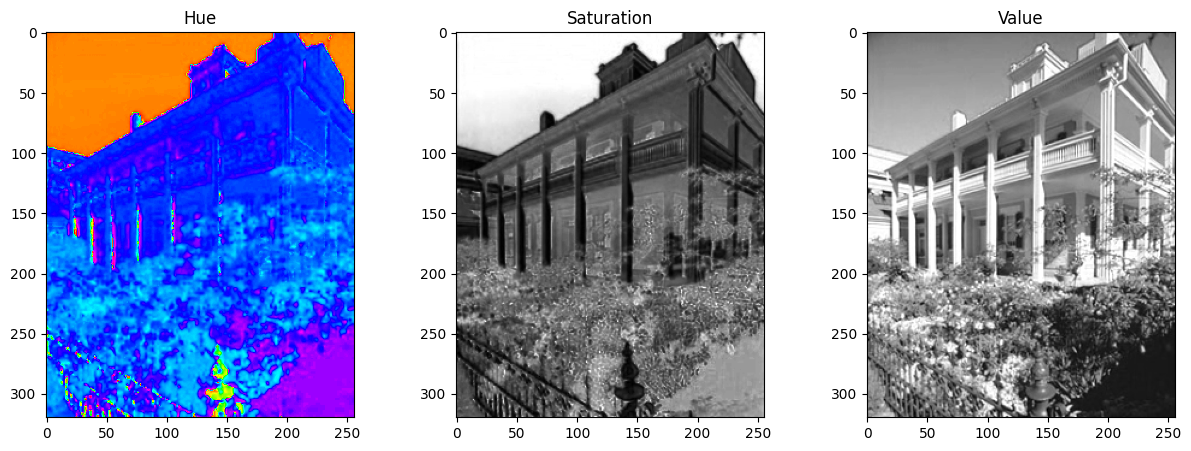

In [35]:
input_image = input_image.astype(np.float32)
print(input_image[0][0])
hsv_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2HSV)
print(hsv_image[0][0])
# Convert HSV back to RGB for display
#rgb_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

# Ensure values are in the correct range
rgb_image = np.clip(hsv_image, 0, 255).astype(np.uint8)

print(rgb_image[0][0])
plt.imshow(rgb_image)
plt.title('HSV converted back to RGB')
plt.show()

# If you want to display individual HSV channels
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(hsv_image[:,:,0], cmap='hsv')
ax1.set_title('Hue')
ax2.imshow(hsv_image[:,:,1], cmap='gray')
ax2.set_title('Saturation')
ax3.imshow(hsv_image[:,:,2], cmap='gray')
ax3.set_title('Value')
plt.show()

In [27]:
test_arr = np.array([27.5434, 256, -1221])
np.clip(test_arr, 0, 255).astype(np.uint8)

array([ 27, 255,   0], dtype=uint8)

In [28]:
hsv_image

array([[[ 27.529413  ,   1.        ,  85.        ],
        [ 28.        ,   0.94736844,  95.        ],
        [ 26.451612  ,   0.9489796 ,  98.        ],
        ...,
        [ 30.285715  ,   0.9722222 , 108.        ],
        [ 31.40187   ,   0.9907407 , 108.        ],
        [ 31.132074  ,   1.        , 106.        ]],

       [[ 27.906975  ,   1.        ,  86.        ],
        [ 28.        ,   0.9375    ,  96.        ],
        [ 27.446808  ,   0.9591837 ,  98.        ],
        ...,
        [ 31.40187   ,   0.9907407 , 108.        ],
        [ 30.27523   ,   0.9909091 , 110.        ],
        [ 30.27523   ,   0.981982  , 111.        ]],

       [[ 28.        ,   1.        ,  90.        ],
        [ 28.387096  ,   0.93939394,  99.        ],
        [ 28.48485   ,   0.980198  , 101.        ],
        ...,
        [ 32.142857  ,   0.99115044, 113.        ],
        [ 30.535713  ,   0.99115044, 113.        ],
        [ 30.535713  ,   0.98245615, 114.        ]],

       ...,

      